In [1]:
import numpy as np
import gzip
from matplotlib import pyplot as plt

In [2]:
# Function to read pixel data from the dataset
def read_pixels(data_path):
    with gzip.open(data_path) as f:
        pixel_data = np.frombuffer(f.read(), 'B', offset=16).astype('float32')
    normalized_pixels = pixel_data / 255
    flattened_pixels = normalized_pixels.reshape(-1, 28*28)
    # Flatten the normalized pixels
    return flattened_pixels

# Function to read label data from the dataset
def read_labels(data_path):
    with gzip.open(data_path) as f:
        label_data = np.frombuffer(f.read(), 'B', offset=8)
    return label_data

images = read_pixels("./train-images-idx3-ubyte.gz")
labels = read_labels("./train-labels-idx1-ubyte.gz")

In [3]:
images.shape

(60000, 784)

In [4]:
labels.max()

9

In [5]:
np.mean(images , axis = 0).shape

(784,)

Q1.1

In [15]:
# mean center the data  
x_meaned = images - np.mean(images, axis=0)
# calculate covariance matrix
cov_mat = np.cov(x_meaned, rowvar=False)
# Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

# sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]

# similarly sort the eigenvectors
sorted_eigenvectors = eigen_vectors[:, sorted_index]

# choose 10 PC
eigenvector_subset = sorted_eigenvectors[:, 0:10]
eigen_values_subset = sorted_eigenvalue[:10]

print("First 10 PCA ", eigenvector_subset)

# Calculate the proportion of variance explained (PVE)
total_variance = np.sum(sorted_eigenvalue)
PVE = sorted_eigenvalue[:10] / total_variance 

print("proportion of variance explained (PVE)")
for i in range(10):
    print(f"PVE for k={i+1}: {PVE[i]}")


First 10 PCA  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
proportion of variance explained (PVE)
PVE for k=1: 0.09704664368151002
PVE for k=2: 0.07095924066613628
PVE for k=3: 0.061690887728496284
PVE for k=4: 0.053894194943091854
PVE for k=5: 0.04868797012682379
PVE for k=6: 0.04312231323349435
PVE for k=7: 0.03271929951323684
PVE for k=8: 0.02883895448304446
PVE for k=9: 0.02762029396742109
PVE for k=10: 0.0235700055115963


Q1.2

In [7]:
k = 1
while True:
    PC = np.sum(sorted_eigenvalue[:k]/total_variance)
    if PC < 0.7:
        print(f"PC for k={k} {PC}")
    else: 
        break
    k+= 1
   
print(f"PC for k={k} {PC}")        
print(f"PC for k={k} is the min number of principal components to explain the 70% of the data.")

PC for k=1 0.09704664368151002
PC for k=2 0.1680058843476463
PC for k=3 0.22969677207614259
PC for k=4 0.2835909670192344
PC for k=5 0.3322789371460582
PC for k=6 0.3754012503795526
PC for k=7 0.4081205498927894
PC for k=8 0.43695950437583386
PC for k=9 0.46457979834325497
PC for k=10 0.4881498038548513
PC for k=11 0.5092416999945412
PC for k=12 0.5294716108091951
PC for k=13 0.5466297928004837
PC for k=14 0.5635509071169658
PC for k=15 0.5793373199278713
PC for k=16 0.5941668460731245
PC for k=17 0.6074124555500645
PC for k=18 0.6201814292345892
PC for k=19 0.632054058620294
PC for k=20 0.6435808956319572
PC for k=21 0.6542425577029631
PC for k=22 0.6643096914142529
PC for k=23 0.6738454246873816
PC for k=24 0.6829708621325816
PC for k=25 0.69180490903893
PC for k=26 0.7001981004236029
PC for k=26 is the min number of principal components to explain the 70% of the data.


Q1.3

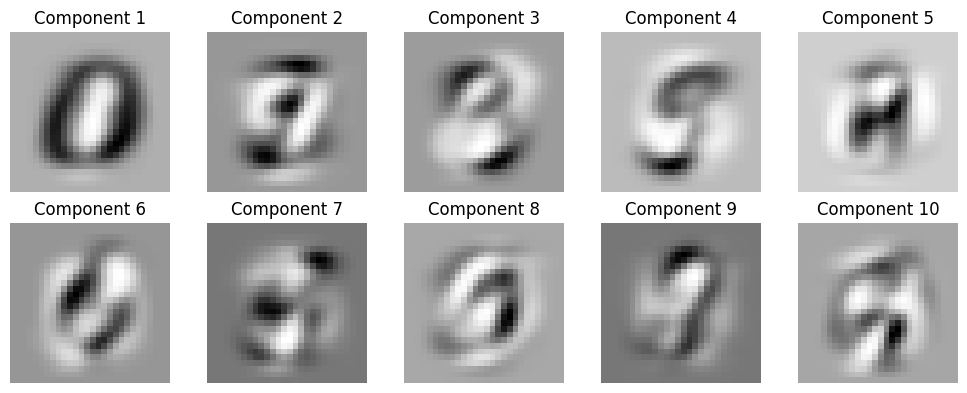

In [18]:
# Assuming eigenvector_subset contains the first 10 principal components

# Reshape and normalize the principal components
n = []

for k in range(10):
    eigenvector_resized = np.reshape(eigenvector_subset.T[k], (28, 28))
    # Apply min-max scaling to each principal component
    normeig = (eigenvector_resized - np.min(eigenvector_resized)) / (np.max(eigenvector_resized) - np.min(eigenvector_resized))
    n.append(normeig)

# Visualize the grayscale principal component images in a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(n[i], cmap='Greys_r')
    ax.axis('off')
    ax.set_title(f'Component {i + 1}')


plt.tight_layout()
plt.show()


In [11]:
def pca(X, k):
    # Calculate the mean of each feature
    mean_X = np.mean(X, axis=0)

    # Mean-center the data
    X_meaned = X - mean_X

    # Calculate the covariance matrix
    cov_mat = np.cov(X_meaned, rowvar=False)

    # Calculate eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top k eigenvectors (principal components)
    principal_components = eigenvectors[:, :k]

    # Project the data onto the selected principal components
    projected_data = np.dot(X_meaned, principal_components)

    return projected_data



Q1.4

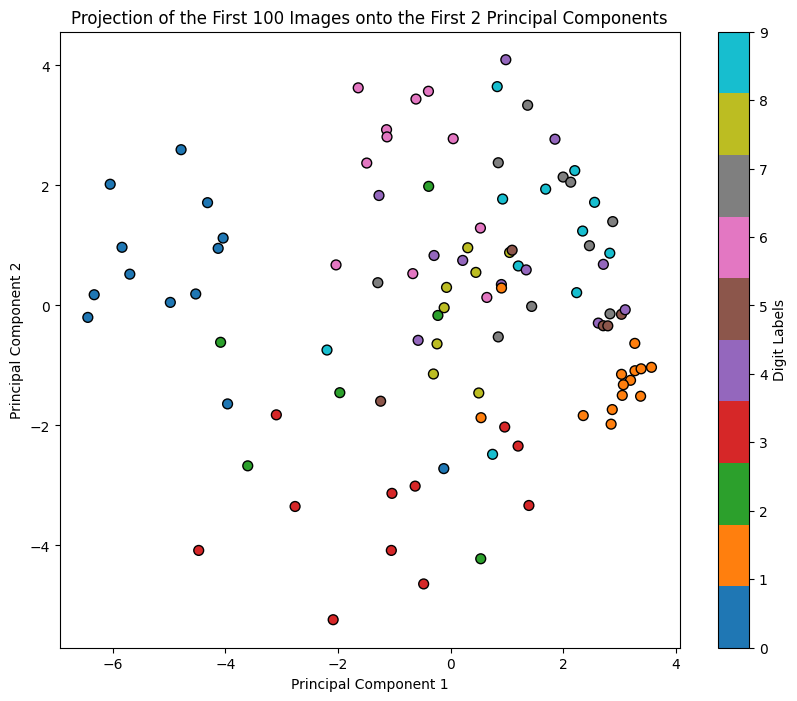

In [12]:
# Select the first 100 images
subset_images = images[:100]
subset_labels = labels[:100]

# Apply PCA to the first 2 principal components
projected_data = pca(images[:100], 2)

# Create a scatter plot colored by labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(projected_data[:, 0], projected_data[:, 1], c=subset_labels, cmap='tab10', edgecolors='k', s=50)

# Add colorbar
plt.colorbar(scatter, label='Digit Labels')

# Label the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.title('Projection of the First 100 Images onto the First 2 Principal Components')
plt.show()

Q1.5

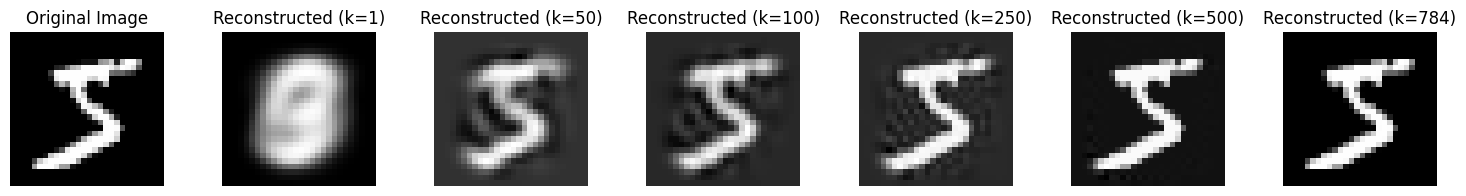

In [19]:
def reconstruct_image(original_image, eigenvectors, mean, k):
    # Project the original image onto the first k principal components
    projected_data = np.dot(original_image - mean, eigenvectors[:, :k])

    # Reconstruct the image from the projected data
    reconstructed_image = np.dot(projected_data, eigenvectors[:, :k].T) + mean

    return reconstructed_image

# Choose the first image for reconstruction
original_image = images[0]

# Choose different values of k
k_values = [1, 50, 100, 250, 500, 784]

# Plot the original and reconstructed images for each value of k
plt.figure(figsize=(15, 2))

# Plot the original image
plt.subplot(1, 7, 1)
plt.imshow(original_image.reshape(28, 28), cmap='Greys_r')
plt.title('Original Image')
plt.axis('off')

# Plot the reconstructed images
for i, k in enumerate(k_values, 1):
    # Reconstruct the image
    reconstructed_image = reconstruct_image(original_image, eigen_vectors, np.mean(images, axis=0), k)

    # Plot the images
    plt.subplot(1, 7, i + 1)
    plt.imshow(reconstructed_image.reshape(28, 28), cmap='Greys_r')
    plt.title(f'Reconstructed (k={k})')
    plt.axis('off')

plt.tight_layout()  # Add this line to adjust subplot parameters for better layout
plt.show()
